## Research Objectives

1. Compare the contributions of fossil fuel and land use change emissions to national and global warming.

Objective:

- To quantify and compare the relative impacts of CO2, CH4, and N2O emissions from fossil fuel use versus land use changes on national and global warming.
To determine which emission source (fossil fuels or land use changes) has a greater impact on global mean surface temperature (GMST) over time.
Approach:

- Develop linear models for GMST response based on emissions from fossil fuels and land use changes.
Compare the coefficients and R-squared values of these models to assess the relative contributions of each emission source.

2. Assess how fossil fuel-related CO2 emissions predict changes in global mean surface temperature.
Objective:

- To establish a predictive relationship between annual fossil fuel-related CO2 emissions and changes in GMST.

- To quantify the sensitivity of GMST to changes in fossil fuel-related CO2 emissions.
Approach:

- Create a linear regression model using fossil fuel-related CO2 emissions as the predictor and GMST change as the response variable.

- Evaluate the model’s performance and interpret the coefficient to understand the magnitude of temperature change associated with a unit change in CO2 emissions.

3. Compare the temperature response to cumulative CO2 emissions with the response from cumulative CH4 and N2O emissions.
Objective:

- To evaluate and compare the warming effects of cumulative CO2, CH4, and N2O emissions on GMST.
- To determine the relative efficacy of each gas in contributing to global warming, considering their cumulative impacts.

Approach:

- Develop separate linear regression models for cumulative emissions of CO2, CH4, and N2O with GMST change as the response variable.

- Compare the coefficients of these models to determine which gas has the highest warming potential per unit of cumulative emissions.


Github Public Repo: https://github.com/JosephRidge/linearmodels/tree/main

# Importing Libraries and Loading Data

### Loading Libraries

In [1]:
import dataDescription as dds
import dataVisualization as dv
import utility as utils
import warnings 
warnings.filterwarnings('ignore')

### Loading the Data

In [2]:
# global mean surface temperature
gmst_df=dds.read_data('data/GHG Emissions/GMST_response_1851-2021.csv')

#cumulative emissions 
cumulative_emissions_df=dds.read_data('data/GHG Emissions/EMISSIONS_CUMULATIVE_CO2e100_1851-2021.csv')

# annual emissions
annual_emissions_df= dds.read_data('data/GHG Emissions/EMISSIONS_ANNUAL_1830-2021.csv')

# country code
country_code_df = dds.read_data('data/GHG Emissions/COUNTRY_GROUPINGS.csv')

<hr>

# Data Understanding

<hr>

## 1. Data Understanding of GMST_response

- Data includes the change in global mean surface temperature (GMST) due to emissions of the **three GHG-gases** during **1851–2021** in units °C.  

- There are **450,585** data rows in the current version.

### Undestanding Data

In [3]:
dds.data_head(gmst_df)

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,3-GHG,Fossil,1851,2.047658e-07,°C
1,Afghanistan,AFG,3-GHG,Fossil,1852,4.112079e-07,°C
2,Afghanistan,AFG,3-GHG,Fossil,1853,6.193339e-07,°C
3,Afghanistan,AFG,3-GHG,Fossil,1854,8.291519e-07,°C
4,Afghanistan,AFG,3-GHG,Fossil,1855,1.040669e-06,°C


### To understand the size of the dataset, we check its shape.



In [4]:
dds.data_shape(gmst_df)

(450585, 7)

### Checking for Missing Values

In [5]:
dds.check_null(gmst_df)

CNTR_NAME    0
ISO3         0
Gas          0
Component    0
Year         0
Data         0
Unit         0
dtype: int64

### Get Summary of the dataset to understand data types and further verify absence of missing values

In [6]:
dds.get_info(gmst_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450585 entries, 0 to 450584
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CNTR_NAME  450585 non-null  object 
 1   ISO3       450585 non-null  object 
 2   Gas        450585 non-null  object 
 3   Component  450585 non-null  object 
 4   Year       450585 non-null  int64  
 5   Data       450585 non-null  float64
 6   Unit       450585 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.1+ MB


### General Statistical Analysis to understand the overall distribution & central tendecies of the data

In [7]:
dds.get_summary(gmst_df)

,Year,Data
count,450585.000000,4.505850e+05
mean,1936.000000,3.265729e-03
std,49.362659,2.816419e-02
min,1851.000000,-1.261315e-03
25%,1893.000000,7.393887e-07
50%,1936.000000,1.834198e-05
75%,1979.000000,2.382394e-04
max,2021.000000,1.610600e+00


## 2. Data Understanding of EMISSIONS_ANNUAL
Data includes annual emissions of:
- CO2 (Pg CO2 year−1)
- CH4 (Tg CH4 year−1) 
- N2O (Tg N2O year−1) 
during **1830–2021**. 

There are **369,048** data rows in the current version. 

*Note*: that data for the years 1830–1849 are provided as these data are needed for the calculation of CO2-equivalent emissions of CH4 using the global warming potential(GWP)* approach during years **1850–1869** 


### Undestanding Data

In [8]:
dds.data_head(annual_emissions_df)

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,CH[4],Fossil,1830,0.018746,Tg~CH[4]~year^-1
1,Afghanistan,AFG,CH[4],Fossil,1831,0.018850,Tg~CH[4]~year^-1
2,Afghanistan,AFG,CH[4],Fossil,1832,0.018953,Tg~CH[4]~year^-1
3,Afghanistan,AFG,CH[4],Fossil,1833,0.019057,Tg~CH[4]~year^-1
4,Afghanistan,AFG,CH[4],Fossil,1834,0.019161,Tg~CH[4]~year^-1


### To understand the size of the dataset, we check its shape.



In [9]:
dds.data_shape(annual_emissions_df)

(369048, 7)

### Checking for Missing Values

In [10]:
dds.check_null(annual_emissions_df)

CNTR_NAME      0
ISO3           0
Gas            0
Component      0
Year           0
Data         768
Unit           0
dtype: int64

### Get Summary of the dataset to understand data types and further verify absence of missing values

In [11]:
dds.get_info(annual_emissions_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369048 entries, 0 to 369047
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CNTR_NAME  369048 non-null  object 
 1   ISO3       369048 non-null  object 
 2   Gas        369048 non-null  object 
 3   Component  369048 non-null  object 
 4   Year       369048 non-null  int64  
 5   Data       368280 non-null  float64
 6   Unit       369048 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 19.7+ MB


### General Statistical Analysis to understand the overall distribution & central tendecies of the data

In [12]:
dds.get_summary(annual_emissions_df)

,Year,Data
count,369048.000000,368280.000000
mean,1926.478734,0.733928
std,54.967060,6.863213
min,1830.000000,-0.401257
25%,1879.000000,0.000124
50%,1927.000000,0.003339
75%,1974.000000,0.043417
max,2021.000000,364.929660


## 3. Data Understanding of EMISSIONS_CUMMULATIVE
Data includes the cumulative CO2 equivalent emissions in units Pg CO2-e100 during **1851–2021**.

There are **450,585** data rows in the current version.

### Undestanding Data

In [13]:
dds.data_head(cumulative_emissions_df)

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,3-GHG,Fossil,1851,0.000455,Pg~CO[2]*-e[100]
1,Afghanistan,AFG,3-GHG,Fossil,1852,0.000913,Pg~CO[2]*-e[100]
2,Afghanistan,AFG,3-GHG,Fossil,1853,0.001375,Pg~CO[2]*-e[100]
3,Afghanistan,AFG,3-GHG,Fossil,1854,0.001841,Pg~CO[2]*-e[100]
4,Afghanistan,AFG,3-GHG,Fossil,1855,0.002311,Pg~CO[2]*-e[100]


### To understand the size of the dataset, we check its shape.



In [14]:
dds.data_shape(cumulative_emissions_df)

(450585, 7)

### Checking for Missing Values

In [15]:
dds.check_null(cumulative_emissions_df)

CNTR_NAME    0
ISO3         0
Gas          0
Component    0
Year         0
Data         0
Unit         0
dtype: int64

### Get Summary of the dataset to understand data types and further verify absence of missing values

In [16]:
dds.get_info(cumulative_emissions_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450585 entries, 0 to 450584
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CNTR_NAME  450585 non-null  object 
 1   ISO3       450585 non-null  object 
 2   Gas        450585 non-null  object 
 3   Component  450585 non-null  object 
 4   Year       450585 non-null  int64  
 5   Data       450585 non-null  float64
 6   Unit       450585 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.1+ MB


### General Statistical Analysis to understand the overall distribution & central tendecies of the data

In [17]:
dds.get_summary(cumulative_emissions_df)

,Year,Data
count,450585.000000,450585.000000
mean,1936.000000,7.251899
std,49.362659,62.541571
min,1851.000000,-2.800884
25%,1893.000000,0.001642
50%,1936.000000,0.040730
75%,1979.000000,0.529036
max,2021.000000,3576.508126


<hr>

# Data Visualizations

<hr>

### 1. Data Visualization of GMST_response

##### Univariate - temperature levels

In [17]:
gmst_df.head()

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,3-GHG,Fossil,1851,2.047658e-07,°C
1,Afghanistan,AFG,3-GHG,Fossil,1852,4.112079e-07,°C
2,Afghanistan,AFG,3-GHG,Fossil,1853,6.193339e-07,°C
3,Afghanistan,AFG,3-GHG,Fossil,1854,8.291519e-07,°C
4,Afghanistan,AFG,3-GHG,Fossil,1855,1.040669e-06,°C


##### Univariate Analysis targeting temperature levels

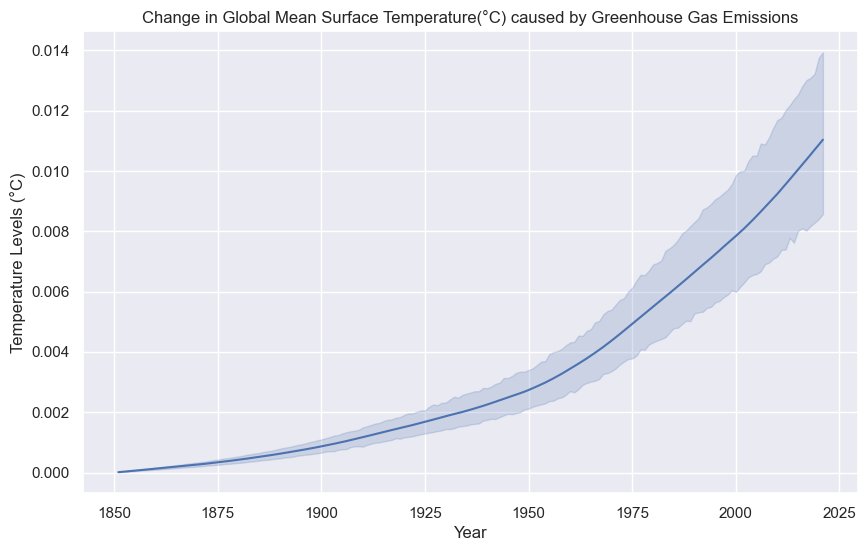

In [18]:
dv.plot_line_graph(df=gmst_df,x="Year",y="Data",x_label="Year",y_label="Temperature Levels (°C)",title="Change in Global Mean Surface Temperature(°C) caused by Greenhouse Gas Emissions")

##### Univariate Analysis targeting Component Field types

In [20]:
gmst_df.head()

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,3-GHG,Fossil,1851,2.047658e-07,°C
1,Afghanistan,AFG,3-GHG,Fossil,1852,4.112079e-07,°C
2,Afghanistan,AFG,3-GHG,Fossil,1853,6.193339e-07,°C
3,Afghanistan,AFG,3-GHG,Fossil,1854,8.291519e-07,°C
4,Afghanistan,AFG,3-GHG,Fossil,1855,1.040669e-06,°C


In [21]:
component_counts =utils.get_category_counts(gmst_df['Component'])
component_index = utils.get_category_index(component_counts)

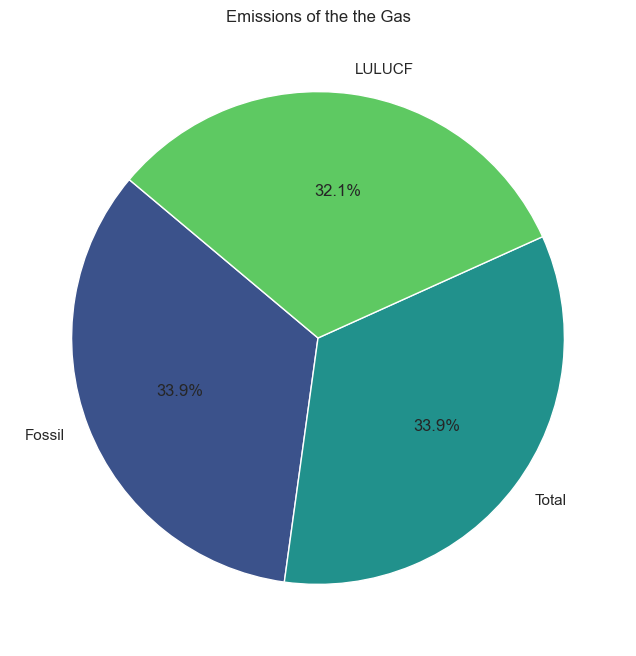

In [22]:
dv.plot_pie_chart(df=component_counts , labels=component_index, title="Emissions of the the Gas")

##### Univariate Analysis targeting GAS types

In [23]:
gas_type_counts =utils.get_category_counts(gmst_df['Gas'])
gas_type_index = utils.get_category_index(gas_type_counts)

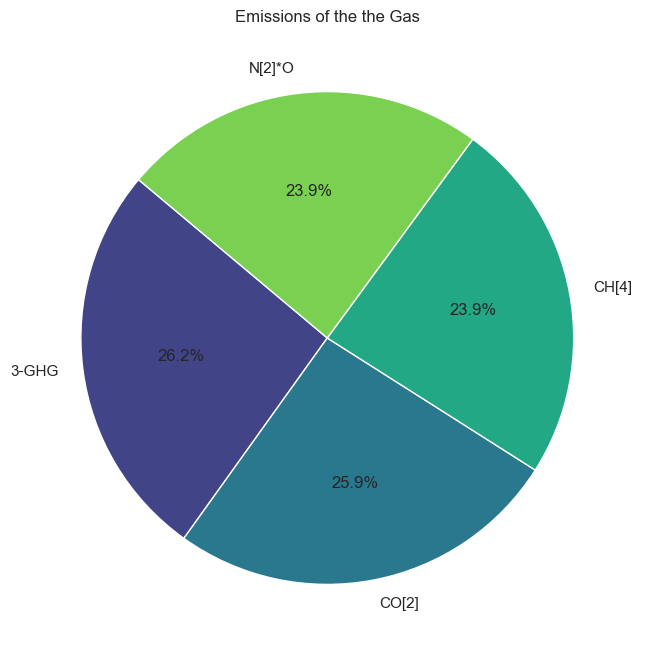

In [24]:
dv.plot_pie_chart(df=gas_type_counts , labels=gas_type_index, title="Emissions of the the Gas")

##### Univariate Analysis targeting Country types

In [25]:
country_count = utils.get_category_counts(gmst_df['CNTR_NAME'])
country_index = utils.get_category_index(country_count)

In [26]:
country_count.describe()

count     236.000000
mean     1909.258475
std       385.858905
min       684.000000
25%      2052.000000
50%      2052.000000
75%      2052.000000
max      2052.000000
Name: count, dtype: float64

### 2. Data Visualization of Annual Emissions of CO2

In [27]:
annual_emissions_df.head()

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,CH[4],Fossil,1830,0.018746,Tg~CH[4]~year^-1
1,Afghanistan,AFG,CH[4],Fossil,1831,0.018850,Tg~CH[4]~year^-1
2,Afghanistan,AFG,CH[4],Fossil,1832,0.018953,Tg~CH[4]~year^-1
3,Afghanistan,AFG,CH[4],Fossil,1833,0.019057,Tg~CH[4]~year^-1
4,Afghanistan,AFG,CH[4],Fossil,1834,0.019161,Tg~CH[4]~year^-1


##### Univariate Analysis targeting Annual Gas levels ()

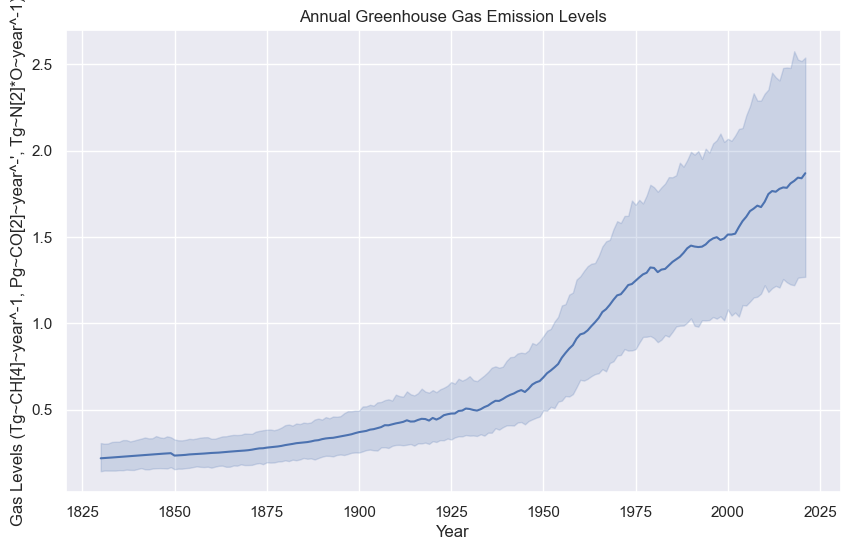

In [28]:
dv.plot_line_graph(df=annual_emissions_df,x="Year",y="Data",x_label="Year",y_label="Gas Levels (Tg~CH[4]~year^-1, Pg~CO[2]~year^-', Tg~N[2]*O~year^-1)",title="Annual Greenhouse Gas Emission Levels")

##### Univariate Analysis targeting Component Field types

In [29]:
annual_component_counts =utils.get_category_counts(annual_emissions_df['Component'])
annual_component_index = utils.get_category_index(annual_component_counts)

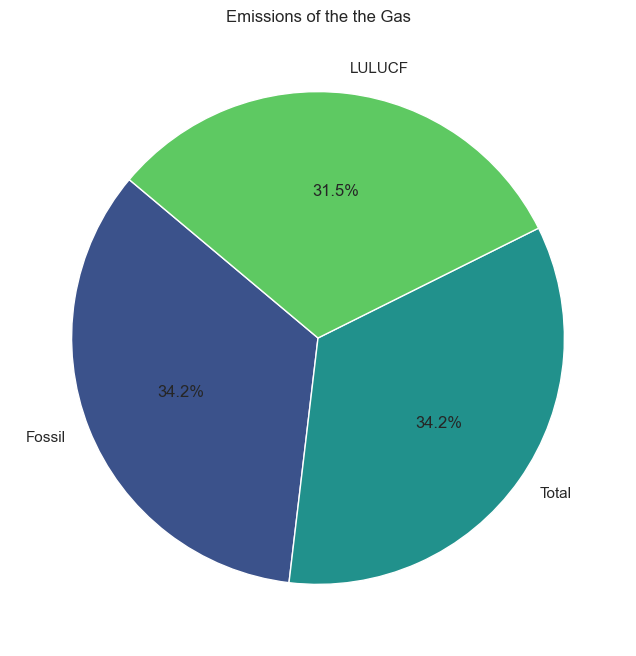

In [30]:
dv.plot_pie_chart(df=annual_component_counts , labels=annual_component_index, title="Emissions of the the Gas")

##### Univariate Analysis targeting Country types

In [31]:
annual_country_count = utils.get_category_counts(annual_emissions_df['CNTR_NAME'])
annual_country_index = utils.get_category_index(annual_country_count)

In [32]:
annual_country_count.describe()

count     236.000000
mean     1563.762712
std       388.890242
min       384.000000
25%      1708.000000
50%      1708.000000
75%      1708.000000
max      1708.000000
Name: count, dtype: float64

### 3. Data Visualization of Cumulative Emissions

In [33]:
cumulative_emissions_df.head()

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,3-GHG,Fossil,1851,0.000455,Pg~CO[2]*-e[100]
1,Afghanistan,AFG,3-GHG,Fossil,1852,0.000913,Pg~CO[2]*-e[100]
2,Afghanistan,AFG,3-GHG,Fossil,1853,0.001375,Pg~CO[2]*-e[100]
3,Afghanistan,AFG,3-GHG,Fossil,1854,0.001841,Pg~CO[2]*-e[100]
4,Afghanistan,AFG,3-GHG,Fossil,1855,0.002311,Pg~CO[2]*-e[100]


##### Univariate - Gas levels

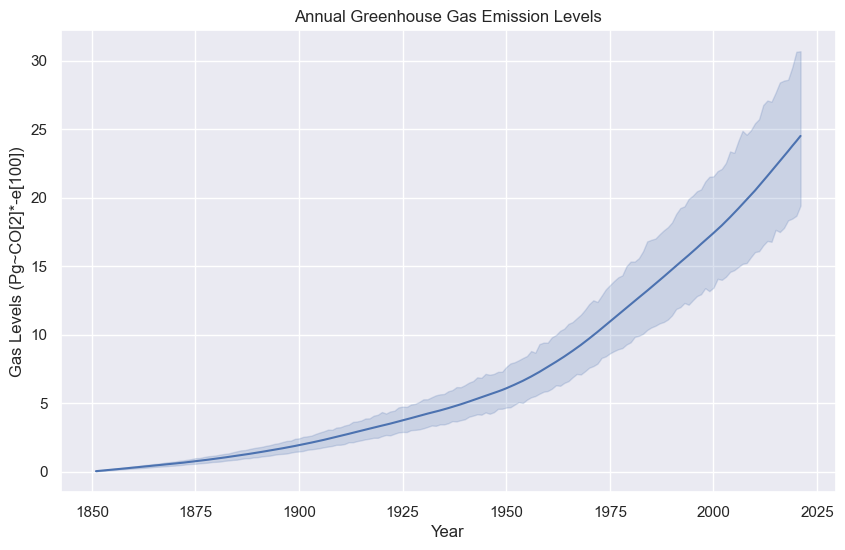

In [34]:
dv.plot_line_graph(df=cumulative_emissions_df,x="Year",y="Data",x_label="Year",y_label="Gas Levels (Pg~CO[2]*-e[100])",title="Annual Greenhouse Gas Emission Levels")

##### Univariate Analysis targeting Component Field types

In [35]:
cumulative_component_counts =utils.get_category_counts(cumulative_emissions_df['Component'])
cumulative_component_index = utils.get_category_index(cumulative_component_counts)

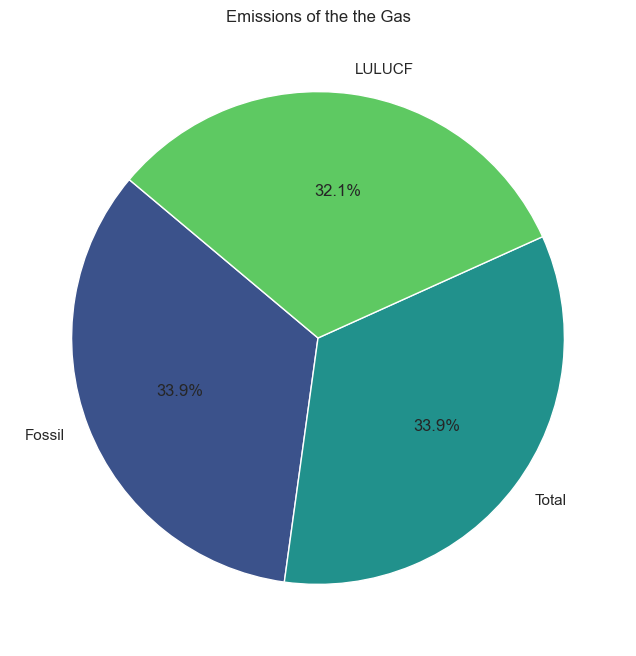

In [36]:
dv.plot_pie_chart(df=cumulative_component_counts , labels=cumulative_component_index, title="Emissions of the the Gas")

##### Univariate Analysis targeting Country types

In [37]:
cumulative_country_count = utils.get_category_counts(cumulative_emissions_df['CNTR_NAME'])
cumulative_country_index = utils.get_category_index(cumulative_country_count)

In [38]:
cumulative_country_count.describe()

count     236.000000
mean     1909.258475
std       385.858905
min       684.000000
25%      2052.000000
50%      2052.000000
75%      2052.000000
max      2052.000000
Name: count, dtype: float64

##### Multivariate Analysis - PCA Plot

<hr>

# Data Preparation

<hr>

- Merge of the three data-sets 
- Filter Based on country Kenya
- Clean Data
- Visualize distributions Data
- Integrate
- Format Data

### 1. Filter Data to Kenya Data

In [7]:
def filter_data(df,column_name, match):
    filtered_df = df[df[column_name] == match ]
    return filtered_df

In [8]:
import pandas as pd
df_kenya_gmst_df = filter_data(df=gmst_df,column_name='CNTR_NAME',match='Kenya')
df_kenya_annual_emissions_df  = filter_data(df=annual_emissions_df,column_name='CNTR_NAME',match='Kenya')
df_kenya_cumulative_emissions_df = filter_data(df=cumulative_emissions_df,column_name='CNTR_NAME',match='Kenya')

In [9]:
df_kenya_cumulative_emissions_df = df_kenya_cumulative_emissions_df.rename(columns={
    'Gas': 'Gas_cumulative_emissions',
    'Component': 'Component_cumulative_emissions',
    'Data': 'Data_cumulative_emissions',
    'Unit': 'Unit_cumulative_emissions'
})

### 2. Merge the data sets

In [10]:
df_kenya = pd.merge(df_kenya_gmst_df, df_kenya_annual_emissions_df, on=['CNTR_NAME', 'ISO3', 'Year'], how='outer', suffixes=('_gmstf','_annual_emissions'))

In [11]:
df_kenya = pd.merge(df_kenya,df_kenya_cumulative_emissions_df, on=['CNTR_NAME', 'ISO3', 'Year'], how='outer', suffixes=('_wololo','_cumulative_emissions'))

In [12]:
df_kenya = pd.DataFrame(df_kenya)

### 3. Data Cleaning

In [13]:
dds.check_null(df_kenya)

CNTR_NAME                         0.0000
ISO3                              0.0000
Gas_gmstf                         0.0762
Component_gmstf                   0.0762
Year                              0.0000
Data_gmstf                        0.0762
Unit_gmstf                        0.0762
Gas_annual_emissions              0.0000
Component_annual_emissions        0.0000
Data_annual_emissions             0.0000
Unit_annual_emissions             0.0000
Gas_cumulative_emissions          0.0762
Component_cumulative_emissions    0.0762
Data_cumulative_emissions         0.0762
Unit_cumulative_emissions         0.0762
dtype: float64

In [14]:
df_kenya = df_kenya.dropna()

In [15]:
columns_to_drop = ['CNTR_NAME','ISO3']
df_kenya=df_kenya.drop(columns=columns_to_drop)

### 4. Visualizations based on the distribution of the gas categories

In [16]:
co2 = pd.DataFrame(df_kenya[df_kenya['Gas_cumulative_emissions'] == 'CO[2]'])
ch4 = pd.DataFrame(df_kenya[df_kenya['Gas_cumulative_emissions'] == 'CH[4]'])
n2o = pd.DataFrame(df_kenya[df_kenya['Gas_cumulative_emissions'] == 'N[2]*O'])
three_ghg = pd.DataFrame(df_kenya[df_kenya['Gas_cumulative_emissions'] == '3-GHG'])

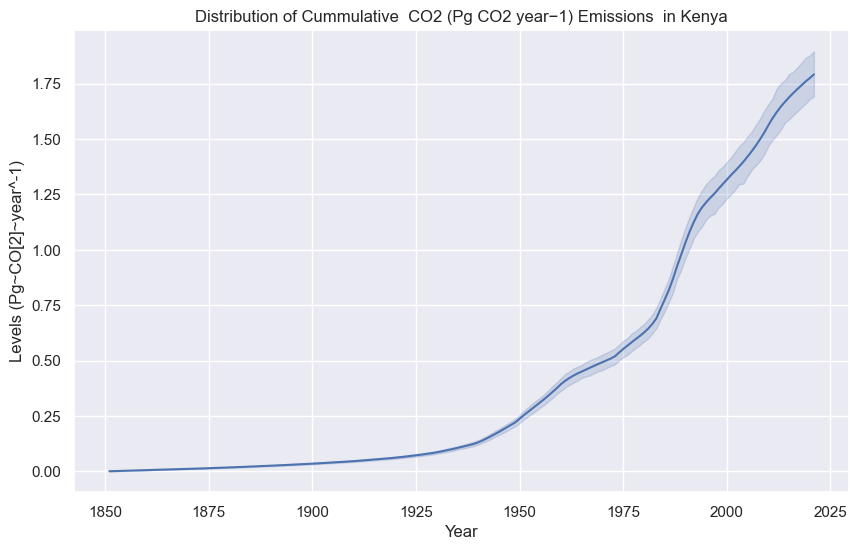

In [17]:
dv.plot_line_graph(df=co2,x="Year",y="Data_cumulative_emissions",x_label="Year",y_label="Levels (Pg~CO[2]~year^-1)",title='Distribution of Cummulative  CO2 (Pg CO2 year−1) Emissions  in Kenya')

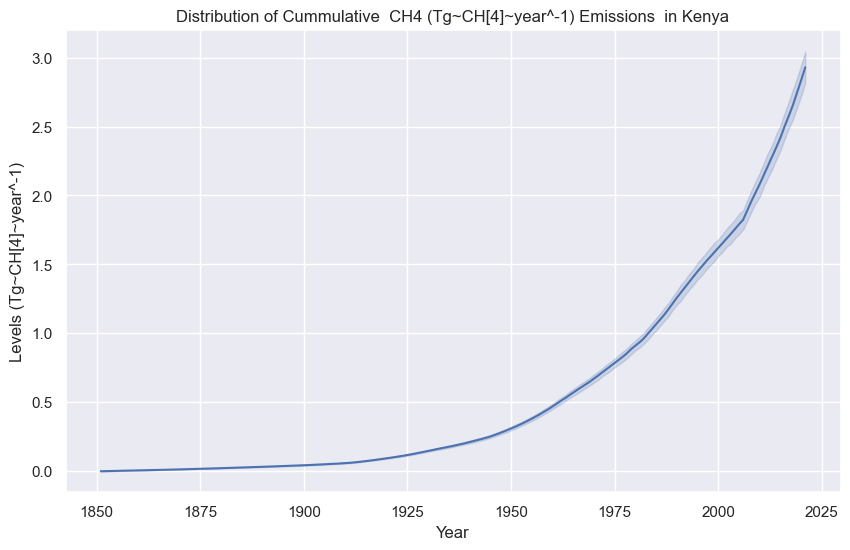

In [82]:
dv.plot_line_graph(df=ch4,x="Year",y="Data_cumulative_emissions",x_label="Year",y_label="Levels (Tg~CH[4]~year^-1)",title='Distribution of Cummulative  CH4 (Tg~CH[4]~year^-1) Emissions  in Kenya')

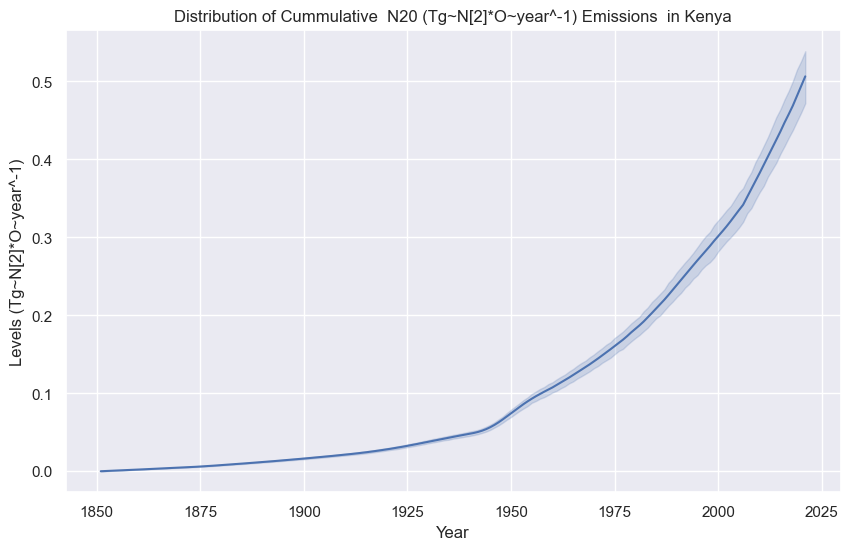

In [83]:
dv.plot_line_graph(df=n2o,x="Year",y="Data_cumulative_emissions",x_label="Year",y_label="Levels (Tg~N[2]*O~year^-1)",title='Distribution of Cummulative  N20 (Tg~N[2]*O~year^-1) Emissions  in Kenya')

In [ ]:
dv.plot_line_graph(df=n20,x="Year",y="Data_cumulative_emissions",x_label="Year",y_label="Levels (Tg~N[2]*O~year^-1)",title='Distribution of Cummulative 3-GHG (Tg~N[2]*O~year^-1) Emissions  in Kenya')

In [84]:
component_counts_kenya =utils.get_category_counts(df_kenya['Component_gmstf'])
component_index_kenya = utils.get_category_index(component_counts_kenya)

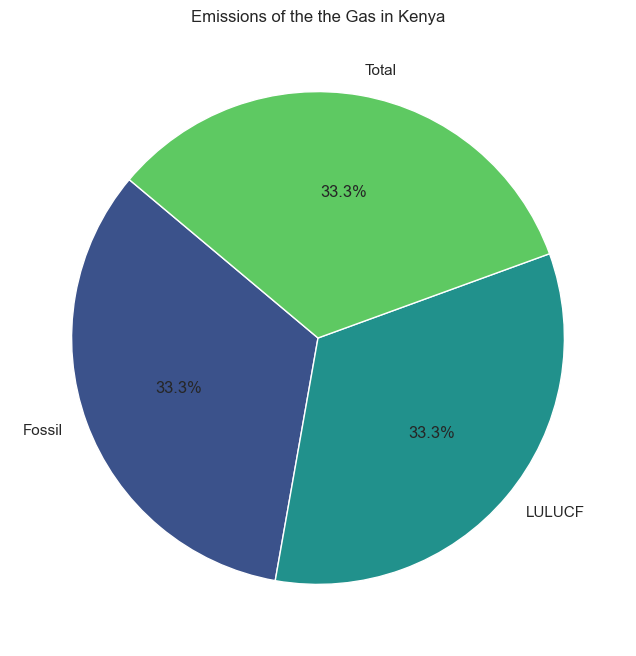

In [85]:
dv.plot_pie_chart(df=component_counts_kenya , labels=component_index_kenya, title="Emissions of the the Gas in Kenya")

In [51]:
gas_type_counts_kenya =utils.get_category_counts(df_kenya['Gas_gmstf'])
gas_type_index_kenya = utils.get_category_index(gas_type_counts_kenya)

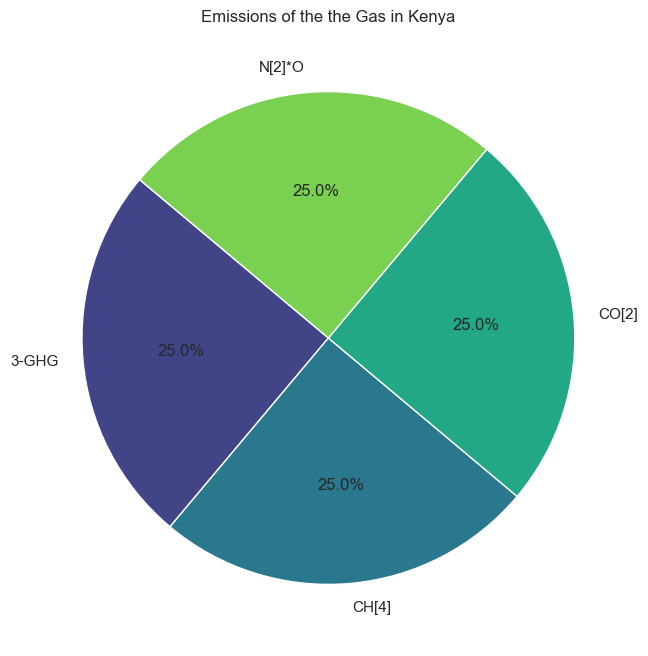

In [75]:
dv.plot_pie_chart(df=gas_type_counts_kenya , labels=gas_type_index_kenya, title="Emissions of the the Gas in Kenya")

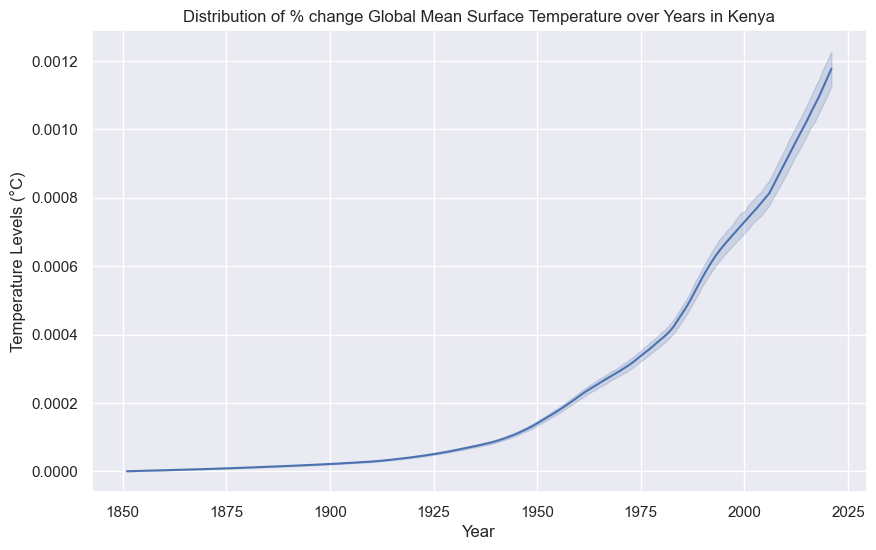

In [76]:
dv.plot_line_graph(df=df_kenya,x="Year",y="Data_gmstf",x_label="Year",y_label="Temperature Levels (°C)",title='Distribution of % change Global Mean Surface Temperature over Years in Kenya')

In [18]:
df_kenya.columns

Index(['Gas_gmstf', 'Component_gmstf', 'Year', 'Data_gmstf', 'Unit_gmstf',
       'Gas_annual_emissions', 'Component_annual_emissions',
       'Data_annual_emissions', 'Unit_annual_emissions',
       'Gas_cumulative_emissions', 'Component_cumulative_emissions',
       'Data_cumulative_emissions', 'Unit_cumulative_emissions'],
      dtype='object')

In [90]:
target_columns = ['Year','Data_annual_emissions','Data_cumulative_emissions','Data_gmstf']
df_selected = df_kenya[target_columns]

In [19]:
df_selected

NameError: name 'df_selected' is not defined

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_theme()

# Plot all columns on the same axes
sns.lineplot(data=df_selected, x='Year', y='Data_annual_emissions', label='Annual Emissions')
sns.lineplot(data=df_selected, x='Year', y='Data_cumulative_emissions', label='Cumulative Emissions')
sns.lineplot(data=df_selected, x='Year', y='Data_gmstf', label='GMST')

plt.title('Plot of Emissions and GMST over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.show()

<hr>

# Data Modeling

<hr>

- Technique Selection
- Design Tests
- Build Model
- Model Assesment

In [ ]:
df_selected.head()

NameError: name 'df_selected' is not defined

In [ ]:
df_kenya.head()

In [27]:
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [48]:
X = df_kenya[['Year', 'Data_annual_emissions', 'Data_cumulative_emissions']]
y = df_kenya['Data_gmstf']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [4.40393124e-06 1.24951089e-04 7.59402848e-05]
Intercept: -0.008334182071316275


In [34]:
y_pred = model.predict(X_test) 

In [35]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared: 0.37814076272002306
Mean Squared Error: 1.37761530336616e-07
Mean Absolute Error: 0.00021835443062192587


### Summary 

- R-squared (0.3781): The model explains about 37.81% of the variance in the target variable.
- Mean Squared Error (1.3776e-07): The average squared difference between predicted and actual values is very low, indicating good predictive accuracy.
- Mean Absolute Error (0.0002184): The average absolute difference between predicted and actual values is also very small, suggesting precise predictions in terms of magnitude.

## Further investigation on Linearity

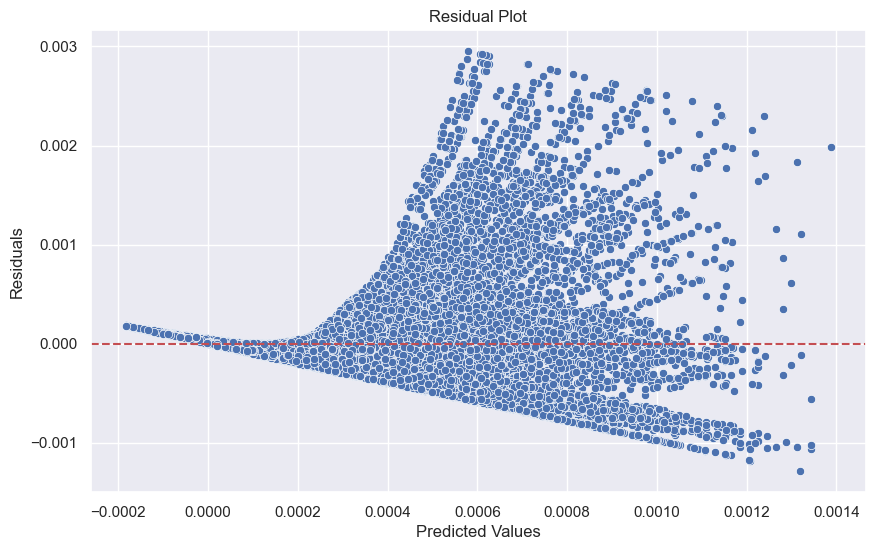

In [36]:
# residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Plotting residuals vs fitted values

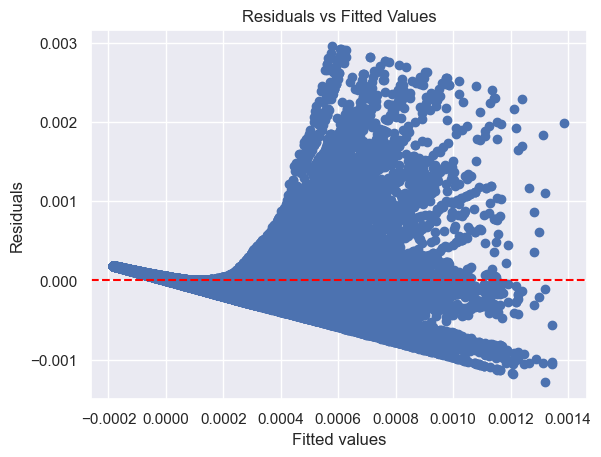

In [37]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

#### Discovery

The curved pattern in the residuals suggests that the linear model may not be adequately capturing the relationship between the independent and dependent variables. This indicates that there might be a **non-linear** **relationship** in the data that the linear model is failing to capture.

#### Using Generalized Linear Model

In [24]:

# Fit a GLM model with a Poisson distribution
glm_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Calculate fitted values and residuals
fitted_values = glm_model.fittedvalues
residuals = y - fitted_values

# Plot residuals vs fitted values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (GLM Poisson)')
plt.show()

NameError: name 'sm' is not defined

Indication: The residuals are mostly negative, which indicates that the model is systematically over-predicting the response variable. Hence we use a polynomial

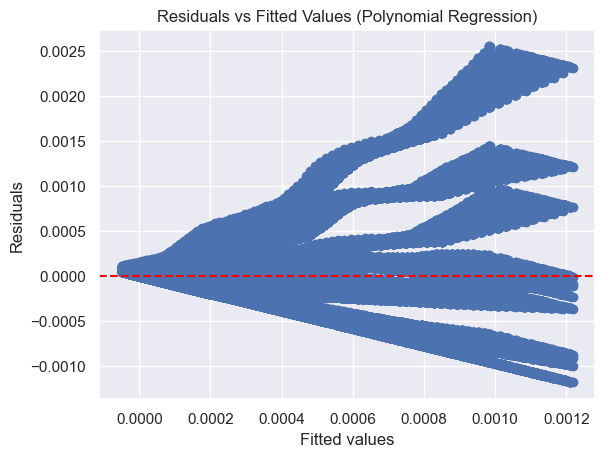

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

degree = 2

poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X, y)

fitted_values = poly_model.predict(X)
residuals = y - fitted_values

plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Polynomial Regression)')
plt.show()

NOTE:
- Heteroscedasticity: The spread of the residuals seems to increase as the fitted values increase. This suggests, variability of the residuals is not constant across the range of fitted values.

- Model may not be a good fit

#### Transformation of data

In [49]:
negative_values = df_kenya[df_kenya['Data_gmstf'] < 0]
print("Number of negative values:", len(negative_values))

Number of negative values: 0


### Fitting Random Forest Model

In [38]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 1.4403033988805082e-07
R-squared: 0.34984318852218077


**Note:** The linear Regression model performs better than the Random Forest

### Tuning the Model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

##### Downside of GridsearchCV is computationally expensive hence we take RandomizedSearchCV

In [41]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': np.arange(5, 11),
    'min_samples_split': np.arange(2, 11)
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, n_iter=50, cv=5, scoring='neg_mean_squared_error')

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
scores = random_search.cv_results_['mean_test_score']
print (scores)

#### Using Hyperband to tune

In [45]:
from sklearn.model_selection import HalvingRandomSearchCV


In [53]:

# Define the parameter grid
param_distributions = {
    'n_estimators': np.arange(10, 200, step=10),
    'max_depth': np.arange(1, 20, step=1),
    'min_samples_split': np.arange(2, 10, step=1),
    'min_samples_leaf': np.arange(1, 10, step=1)
}

search = HalvingRandomSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions,
    n_jobs=-1,
    cv=3,
    factor=3,
    random_state=42
)

In [54]:
# Fit the search
search.fit(X_train, y_train)

# Print the best parameters found
print(f"Best parameters found: {search.best_params_}")